In [1]:
import numpy as np
import matplotlib.pyplot as plt

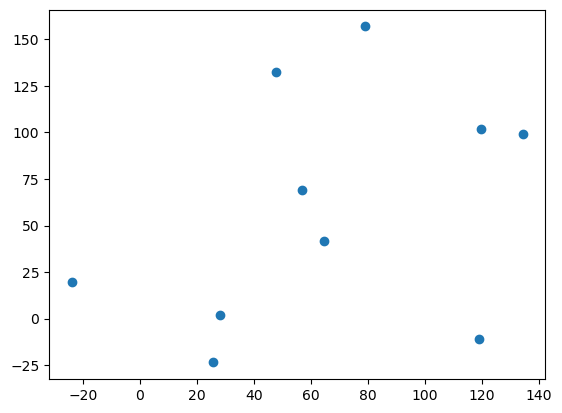

In [2]:
# import the required libraries
import random

# store the random numbers in a list

mu = 100
sigma = 50
x = np.array([ [random.gauss(mu, sigma)] for i in range(10) ], dtype=np.float32)
y = np.array([ _ + random.gauss(0, 50) for _ in x ])

# plotting a graph
plt.scatter(x, y) #, bins = 200)
plt.show()


In [3]:
import torch

In [4]:
y

array([[132.76196  ],
       [  2.1548882],
       [ 19.721504 ],
       [ 69.267105 ],
       [ 99.30313  ],
       [ 41.90458  ],
       [-11.133339 ],
       [102.0726   ],
       [156.97775  ],
       [-23.601076 ]], dtype=float32)

In [5]:
X_train = torch.from_numpy(x)
Y_train = torch.from_numpy(y)

In [6]:
print('requires_grad for X : ', X_train.requires_grad)
print('requires_grad for Y : ', Y_train.requires_grad)

requires_grad for X :  False
requires_grad for Y :  False


In [7]:
input_size = 1
hidden_size = 1
output_size = 1


In [8]:
w1 = torch.rand(
    input_size,
    hidden_size,
    requires_grad=True
    )
w1.shape

torch.Size([1, 1])

In [9]:
w2 = torch.rand(
    hidden_size,
    output_size,
    requires_grad=True
    )
w2.shape

torch.Size([1, 1])

In [10]:
learning_rate = 1e-6

In [11]:
for iter in range(1,1000):
    y_pred = X_train.mm(w1).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()
    
    if iter % 100 == 0:
        print(iter, loss.item(), w1, w2)
    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

100 33533.97265625 tensor([[0.8829]], requires_grad=True) tensor([[0.8539]], requires_grad=True)
200 33533.97265625 tensor([[0.8829]], requires_grad=True) tensor([[0.8539]], requires_grad=True)
300 33533.97265625 tensor([[0.8829]], requires_grad=True) tensor([[0.8539]], requires_grad=True)
400 33533.97265625 tensor([[0.8829]], requires_grad=True) tensor([[0.8539]], requires_grad=True)
500 33533.97265625 tensor([[0.8829]], requires_grad=True) tensor([[0.8539]], requires_grad=True)
600 33533.97265625 tensor([[0.8829]], requires_grad=True) tensor([[0.8539]], requires_grad=True)
700 33533.97265625 tensor([[0.8829]], requires_grad=True) tensor([[0.8539]], requires_grad=True)
800 33533.97265625 tensor([[0.8829]], requires_grad=True) tensor([[0.8539]], requires_grad=True)
900 33533.97265625 tensor([[0.8829]], requires_grad=True) tensor([[0.8539]], requires_grad=True)


In [12]:
x_train_tensor = torch.from_numpy(x)
x_train_tensor

tensor([[ 47.8547],
        [ 28.2034],
        [-23.8888],
        [ 56.7601],
        [134.2203],
        [ 64.5452],
        [119.0125],
        [119.8065],
        [ 79.0030],
        [ 25.6988]])

In [13]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[ 36.0751],
        [ 21.2610],
        [-18.0085],
        [ 42.7884],
        [101.1815],
        [ 48.6571],
        [ 89.7171],
        [ 90.3157],
        [ 59.5562],
        [ 19.3729]], grad_fn=<MmBackward0>)

In [14]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[ 36.075077],
       [ 21.26105 ],
       [-18.0085  ],
       [ 42.78838 ],
       [101.18151 ],
       [ 48.657135],
       [ 89.71715 ],
       [ 90.31574 ],
       [ 59.556156],
       [ 19.372917]], dtype=float32)

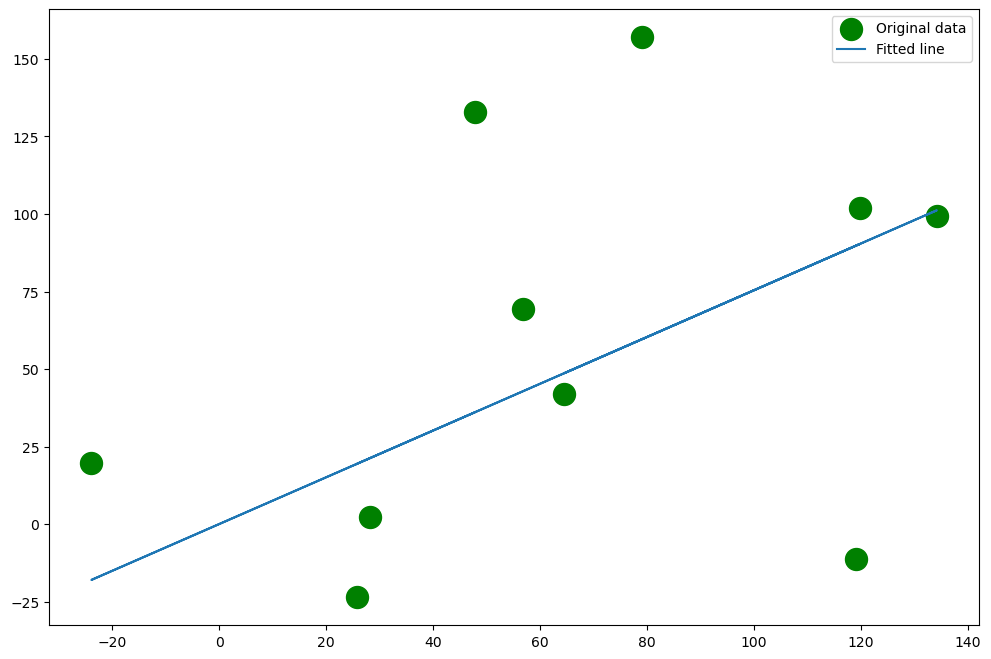

In [15]:
plt.figure(figsize=(12, 8))

plt.scatter(x, y, label = 'Original data', s=250, c='g') 

plt.plot(x, predicted, label = 'Fitted line ')

plt.legend() 

plt.show()